In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print ('Python : {}'.format(sys.version))
print ('Numpy : {}'.format(numpy.__version__))
print ('Matplotlib : {}'.format(matplotlib.__version__))
print ('Pandas : {}'.format(pandas.__version__))
print ('Sklearn : {}'.format(sklearn.__version__))

Python : 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
Numpy : 1.16.4
Matplotlib : 3.1.0
Pandas : 0.24.2
Sklearn : 0.21.2


In [2]:
import numpy as np
from sklearn import preprocessing,model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Loading th dataset from URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
# attributes selected taken from URL
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion',
        'single_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
# class is the prediction it can be 2 or 4
# class 2 indicates not cancerous and 4 indicates cancerous
# data file
data_file = pd.read_csv(url,names=names)

In [9]:
# Data Preprocessing
# There are some data values which are missing
# Replaces missing(?) with -99999
data_file.replace('?','-99999',inplace=True)
print (data_file.axes)

# Dropping the 'id' field of dataset as it does not contribute
data_file.drop(['id'],1,inplace=True)

# Printing the number of rows and columns inn dataset
print (data_file.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [13]:
# Creating a data frame to analyze kurtosis and skewness of data set
data_frame = pd.DataFrame(data_file)
print ('Skewness of data set : ')
print (data_frame.skew())
print ('Kurtosis of data set : ')
print (data_frame.kurtosis())

Skewness of data set : 
clump_thickness           0.592859
uniform_cell_size         1.233137
uniform_cell_shape        1.161859
marginal_adhesion         1.524468
single_epithelial_size    1.712172
bland_chromatin           1.099969
normal_nucleoli           1.422261
mitoses                   3.560658
class                     0.654564
dtype: float64
Kurtosis of data set : 
clump_thickness           -0.623715
uniform_cell_size          0.098803
uniform_cell_shape         0.007011
marginal_adhesion          0.987947
single_epithelial_size     2.169066
bland_chromatin            0.184621
normal_nucleoli            0.474269
mitoses                   12.657878
class                     -1.576064
dtype: float64


In [10]:
# Printing out some values and data set description
print (data_file.loc[24])
print (data_file.describe())

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 24, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699

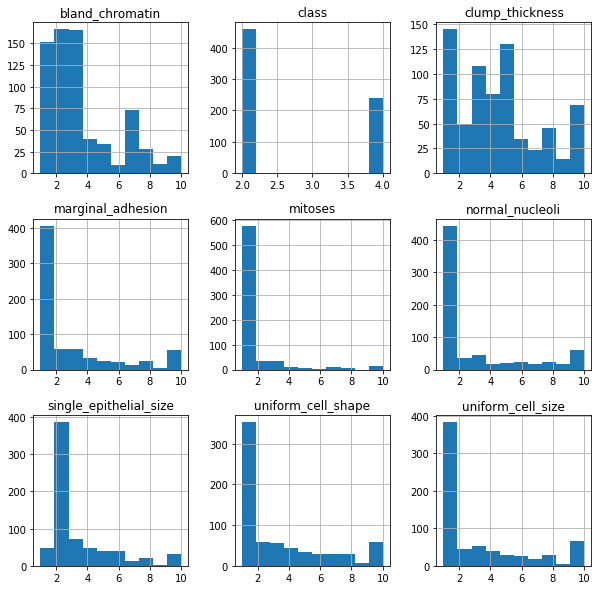

In [12]:
# Plotting as a histogram each attribute
data_file.hist(figsize = (10,10))
plt.show()

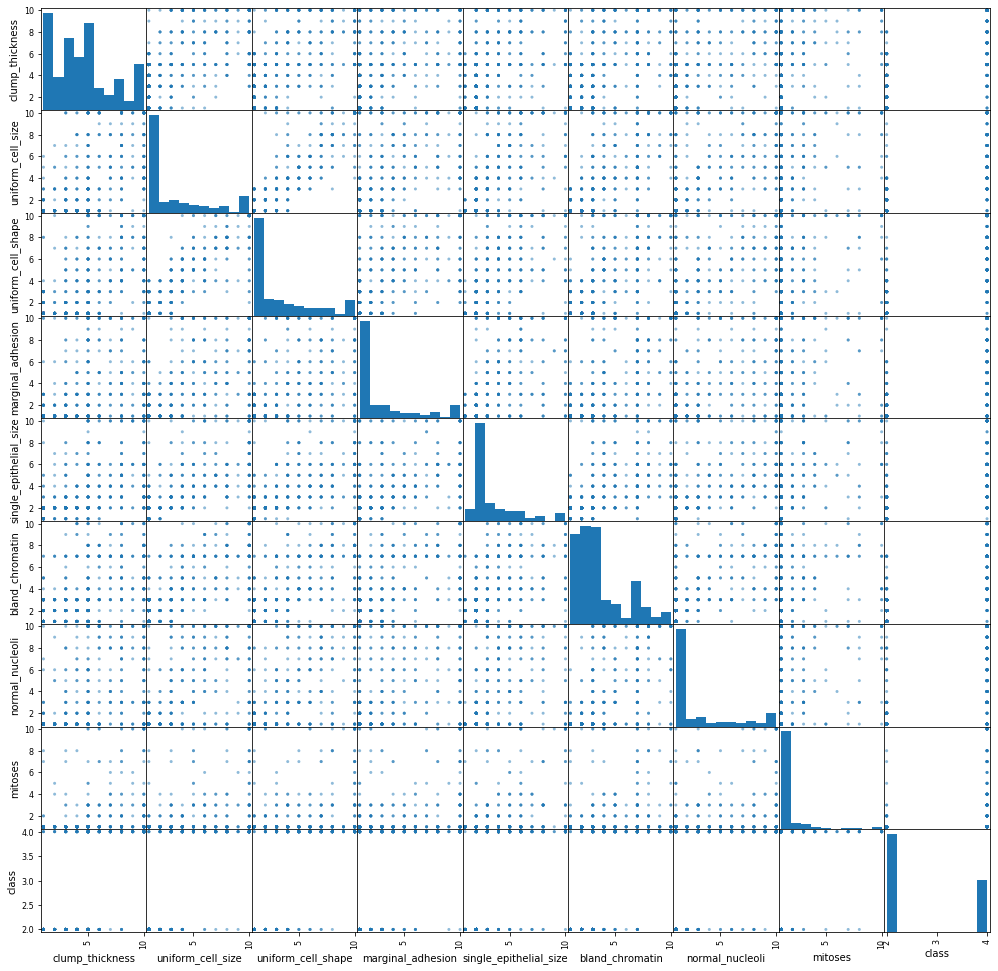

In [13]:
# Scatter plot for every pair of attributes
scatter_matrix(data_file,figsize=(17,17))
plt.show()               

In [28]:
# Splitting the datasets into Test and Training set
# X will not consist of class
# y will consist of only class
X = np.array(data_file.drop(['class'],1))
y = np.array(data_file['class'])

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25)

In [29]:
# More Testing options
# Using seed will decrease the random answer
# using the same seed every time will result in same answer
seed = 0
scoring = 'accuracy'

In [33]:
# Define the models to train
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

# Evaluating each model
# Mean gives average cross validation score of the model
# Standard Deviation gives an idea about the spread of values
results=[]
names=[]
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f) " %(name,cv_results.mean(),cv_results.std())
    print (msg)
    

KNN : 0.965675 (0.016452) 
SVM : 0.956023 (0.019370) 


/home/shreyas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/shreyas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/shreyas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/shreyas/anaconda3/lib/python3.7/site-packages/

In [39]:
# Making the predictions for testing set
# accuracy_score tells about the accuracy score of the model
# classification report gives more info
# precision tells about false positives that telling a non cancerous as cancerous (positive as negative)
# recall tells about false negatives telling cancerous as non cancerous

for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print ('Model : '+name)
    print ('Accuracy Percentage : ',end="")
    print (accuracy_score(y_test,y_pred)*100)
    print ('Confusion Matrix : ')
    print (confusion_matrix(y_test,y_pred))
    print ('Classification Report : ')
    print (classification_report(y_test,y_pred))

Model : KNN
Accuracy Percentage : 98.28571428571429
Confusion Matrix : 
[[108   0]
 [  3  64]]
Classification Report : 
              precision    recall  f1-score   support

           2       0.97      1.00      0.99       108
           4       1.00      0.96      0.98        67

    accuracy                           0.98       175
   macro avg       0.99      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

Model : SVM
Accuracy Percentage : 97.14285714285714
Confusion Matrix : 
[[104   4]
 [  1  66]]
Classification Report : 
              precision    recall  f1-score   support

           2       0.99      0.96      0.98       108
           4       0.94      0.99      0.96        67

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



/home/shreyas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
